# Test tensorflow gpu #

In [1]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
  except RuntimeError as e:
    print(e)

C:\Users\lukas\anaconda3\envs\ML\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\lukas\anaconda3\envs\ML\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\lukas\anaconda3\envs\ML\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Dataset #

In [2]:
import os
import codecs

data = {}
classes_file = './TextData/classes.txt'
with codecs.open(classes_file, 'r', encoding='utf-8') as cF:
    data = cF.read().split('\r\n')
len(data)

94

In [3]:
import os
from PIL import Image, ImageDraw, ImageFont

text_source = './TextData/text_full.txt'
fonts_path = './TextData/Fonts'
fonts = [f'{fonts_path}/{f}' for f in os.listdir(fonts_path)]
fonts

['./TextData/Fonts/arial.ttf',
 './TextData/Fonts/arialbd.ttf',
 './TextData/Fonts/arialbi.ttf',
 './TextData/Fonts/ariali.ttf',
 './TextData/Fonts/calibri.ttf',
 './TextData/Fonts/calibrib.ttf',
 './TextData/Fonts/calibrii.ttf',
 './TextData/Fonts/calibriz.ttf',
 './TextData/Fonts/cambria.ttc',
 './TextData/Fonts/cambriab.ttf',
 './TextData/Fonts/cambriai.ttf',
 './TextData/Fonts/cambriaz.ttf',
 './TextData/Fonts/consola.ttf',
 './TextData/Fonts/consolab.ttf',
 './TextData/Fonts/consolai.ttf',
 './TextData/Fonts/consolaz.ttf',
 './TextData/Fonts/constan.ttf',
 './TextData/Fonts/constanb.ttf',
 './TextData/Fonts/constani.ttf',
 './TextData/Fonts/constanz.ttf',
 './TextData/Fonts/corbel.ttf',
 './TextData/Fonts/cour.ttf',
 './TextData/Fonts/courbd.ttf',
 './TextData/Fonts/courbi.ttf',
 './TextData/Fonts/couri.ttf',
 './TextData/Fonts/impact.ttf',
 './TextData/Fonts/Roboto-Black.ttf',
 './TextData/Fonts/Roboto-BlackItalic.ttf',
 './TextData/Fonts/Roboto-Bold.ttf',
 './TextData/Fonts/Robo

In [4]:
dataset = []
sequence_len = 20

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2

def draw_img(img):
    plt.imshow(np.asarray(img), cmap='gray', vmin=0, vmax=255)
    plt.show()

def load_img(img):
    return cv2.imread(img, cv2.IMREAD_GRAYSCALE)

def dilate_img(img):
    return cv2.dilate(img, np.ones((2,2), np.uint8))

def otsu_thresholding(img):
    norm_img = np.zeros(img.shape)
    img = cv2.normalize(img, norm_img, 0, 255, cv2.NORM_MINMAX)
    blur = cv2.GaussianBlur(img, (3,3), 0)
    _, img = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    img = dilate_img(img)
    return img

## Load dataset ##

In [6]:
with open(text_source) as txt:
    word_count = 0
    sequence = ''
    dataset = []
    for i, line in enumerate(txt):
        words = line.split(' ')
        for single_word in words:
            word = ''.join([c for c in single_word if c in data])
            word.replace('\n', ' ')
            
            if len(word) < 1:
                continue
            
            if len(word) > 30:
                split_count = len(word) // 30 + 1
                for i in range(split_count):
                    start = i * split_count
                    end = start + len(word) // split_count
                    dataset.append(word[start:end])          
                continue
                
            sequence = sequence + word + ' '
            word_count = (word_count + 1) % sequence_len
            if word_count == 0 or len(sequence) > 85:
                dataset.append(sequence[:-1])
                sequence = ''
                
dataset = list(set(dataset))
len(dataset)

34791

## Shuffle dataset ##

In [7]:
sorted_data = sorted(dataset, key=len)
longest_label = len(sorted_data[-1])
longest_label

115

In [8]:
import random

random.seed = 1234567

random.shuffle(dataset)
# dataset = dataset[:20000]
dataset

['It  separated   from  the mainstem  of  the River   Brethren due   to  its allowance of  ',
 'not  sit well   with Edwards,  who   promptly   sacked  White   as Welfare  Minister, ',
 'Carolina   Agricultural and  Technical State University in  the 1999 ',
 "battalion   might depart for the   Horn   'some  time in  September  [2012].'In   addition,",
 'of Justice Ramon   Magsaysay Award: Public  Service  to ',
 'average birthrate of   2:1,   hairless',
 '2,  2016 at  the MIAA Football ',
 'head   coaches are  Tom   Selvik.   Among   its chairmen  of the board   are Gerhard ',
 'Horse Comics in Dark   Horse   Presents   #1 (July   1986).',
 "post   office opened on 16 August 1909.  In   1912   the irrigation  settlement's  name ",
 'killing   10-12 Pakistani  Rangers.On   10  January   2018,   India ',
 'Festival  honors  heritage   in   Walk   of  History   Yeaton biographical  ',
 'also played   for  Wrexham  and played four  times   for   Wales,  scoring   once, against  ',
 'was  

# Split data #

In [9]:
train_split = int(0.9 * len(dataset))
val_split = int(train_split + 0.09 * len(dataset))
# test_split = int(train_split + 0.1 * len(dataset))

train_labels = dataset[:train_split]
val_labels = dataset[train_split:val_split]
test_labels = dataset[val_split:]

# val_labels = dataset[train_split:val_split]
# test_labels = dataset[val_split:]

print('Len train: ' + str(len(train_labels)))
print('Len val: ' + str(len(val_labels)))
print('Len test: ' + str(len(test_labels)))

Len train: 31311
Len val: 3131
Len test: 349


# Model #

In [10]:
timesteps = 256

width = 4096
height = 64

max_label_len = longest_label + 2
max_label_len

117

In [11]:
from tensorflow.keras import applications, backend as K
from tensorflow.keras import models, losses, optimizers, Model, utils
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Dropout
from tensorflow.keras.layers import Flatten, Dense, Lambda, Reshape, Bidirectional, LSTM, GRU
from tensorflow.keras.layers import Activation, add, Concatenate, Attention, Embedding

def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)

def build_model(num_classes=94, timesteps=timesteps, max_label_len=max_label_len, input_shape=(4096, 64, 1), training=False):
    inputs = Input(name='the_inputs', shape=input_shape, dtype='float32')
    
    # Convolution layer (VGG)
    inner = Conv2D(32, (3, 3), padding='same', name='conv1-1', kernel_initializer='he_normal')(inputs)
    inner = BatchNormalization()(inner)
    inner = Activation('relu')(inner)
    inner = Conv2D(32, (3, 3), padding='same', name='conv1-2', kernel_initializer='he_normal')(inputs)
    inner = BatchNormalization()(inner)
    inner = Activation('relu')(inner)
    inner = MaxPooling2D(pool_size=(2, 2), name='max1')(inner)

    inner = Conv2D(64, (3, 3), padding='same', name='conv2-1', kernel_initializer='he_normal')(inner)
    inner = BatchNormalization()(inner)
    inner = Activation('relu')(inner)
    inner = Conv2D(64, (3, 3), padding='same', name='conv2-2', kernel_initializer='he_normal')(inner)
    inner = BatchNormalization()(inner)
    inner = Activation('relu')(inner)
    inner = MaxPooling2D(pool_size=(2, 2), name='max2')(inner)

    inner = Conv2D(128, (3, 3), padding='same', name='conv3-1', kernel_initializer='he_normal')(inner)
    inner = BatchNormalization()(inner)
    inner = Activation('relu')(inner)
    inner = Conv2D(128, (3, 3), padding='same', name='conv3-2', kernel_initializer='he_normal')(inner)
    inner = BatchNormalization()(inner)
    inner = Activation('relu')(inner)
    inner = MaxPooling2D(pool_size=(4, 2), name='max3')(inner)

    inner = Conv2D(256, (3, 3), padding='same', name='conv4-1', kernel_initializer='he_normal')(inner)
    inner = BatchNormalization()(inner)
    inner = Activation('relu')(inner)
    inner = Conv2D(256, (3, 3), padding='same', name='conv4-2')(inner)
    inner = BatchNormalization()(inner)
    inner = Activation('relu')(inner)
    inner = MaxPooling2D(pool_size=(1, 2), name='max4')(inner)

    inner = Conv2D(512, (2, 2), padding='same', kernel_initializer='he_normal', name='con5-1')(inner)
    inner = BatchNormalization()(inner)
    inner = Activation('relu')(inner)
    inner = Conv2D(512, (2, 2), padding='same', kernel_initializer='he_normal', name='con5-2')(inner)
    inner = BatchNormalization()(inner)
    inner = Activation('relu')(inner)

    # CNN to RNN
    inner = Reshape(target_shape=((timesteps, 2048)), name='reshape')(inner)
    inner = Dense(128, activation='relu', kernel_initializer='he_normal', name='dense1')(inner)
    inner = Dropout(0.2)(inner)

    # RNN
    # encoder
    encoder = Bidirectional(LSTM(256, return_sequences=True, return_state=True))
    encoder_outputs, forward_h, forward_c, backward_h, backward_c = encoder(inner)
    state_h = Concatenate()([forward_h, backward_h])
    state_c = Concatenate()([forward_c, backward_c])
    encoder_states = [state_h, state_c]

    # decoder
    decoder_lstm = LSTM(512, return_sequences=True, return_state=True)
    decoder_outputs, _, _ = decoder_lstm(inner, initial_state=encoder_states)
    
    attention = Attention()([encoder_outputs, decoder_outputs])
    attention = Dropout(0.2)(attention)
    # RNN output -> character activations:
    outer = Dense(num_classes + 1, kernel_initializer='he_normal', name='dense2')(attention)
    y_pred = Activation('softmax', name='softmax')(outer)

    labels = Input(name='the_labels', shape=[max_label_len], dtype='float32')
    input_length = Input(name='input_length', shape=[1], dtype='int64')
    label_length = Input(name='label_length', shape=[1], dtype='int64')

    # Keras doesn't currently support loss funcs with extra parameters
    # so CTC loss is implemented in a lambda layer
    loss_out = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([y_pred, labels, input_length, label_length]) #(None, 1)
    
    y_func = K.function([inputs], [y_pred])
    if training:
        return Model(inputs=[inputs, labels, input_length, label_length], outputs=loss_out), y_func
    else:
        return Model(inputs=[inputs], outputs=y_pred)

In [12]:
model, y_func = build_model(timesteps=timesteps, max_label_len=max_label_len, training=True)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_inputs (InputLayer)         [(None, 4096, 64, 1) 0                                            
__________________________________________________________________________________________________
conv1-2 (Conv2D)                (None, 4096, 64, 32) 320         the_inputs[0][0]                 
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 4096, 64, 32) 128         conv1-2[0][0]                    
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 4096, 64, 32) 0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

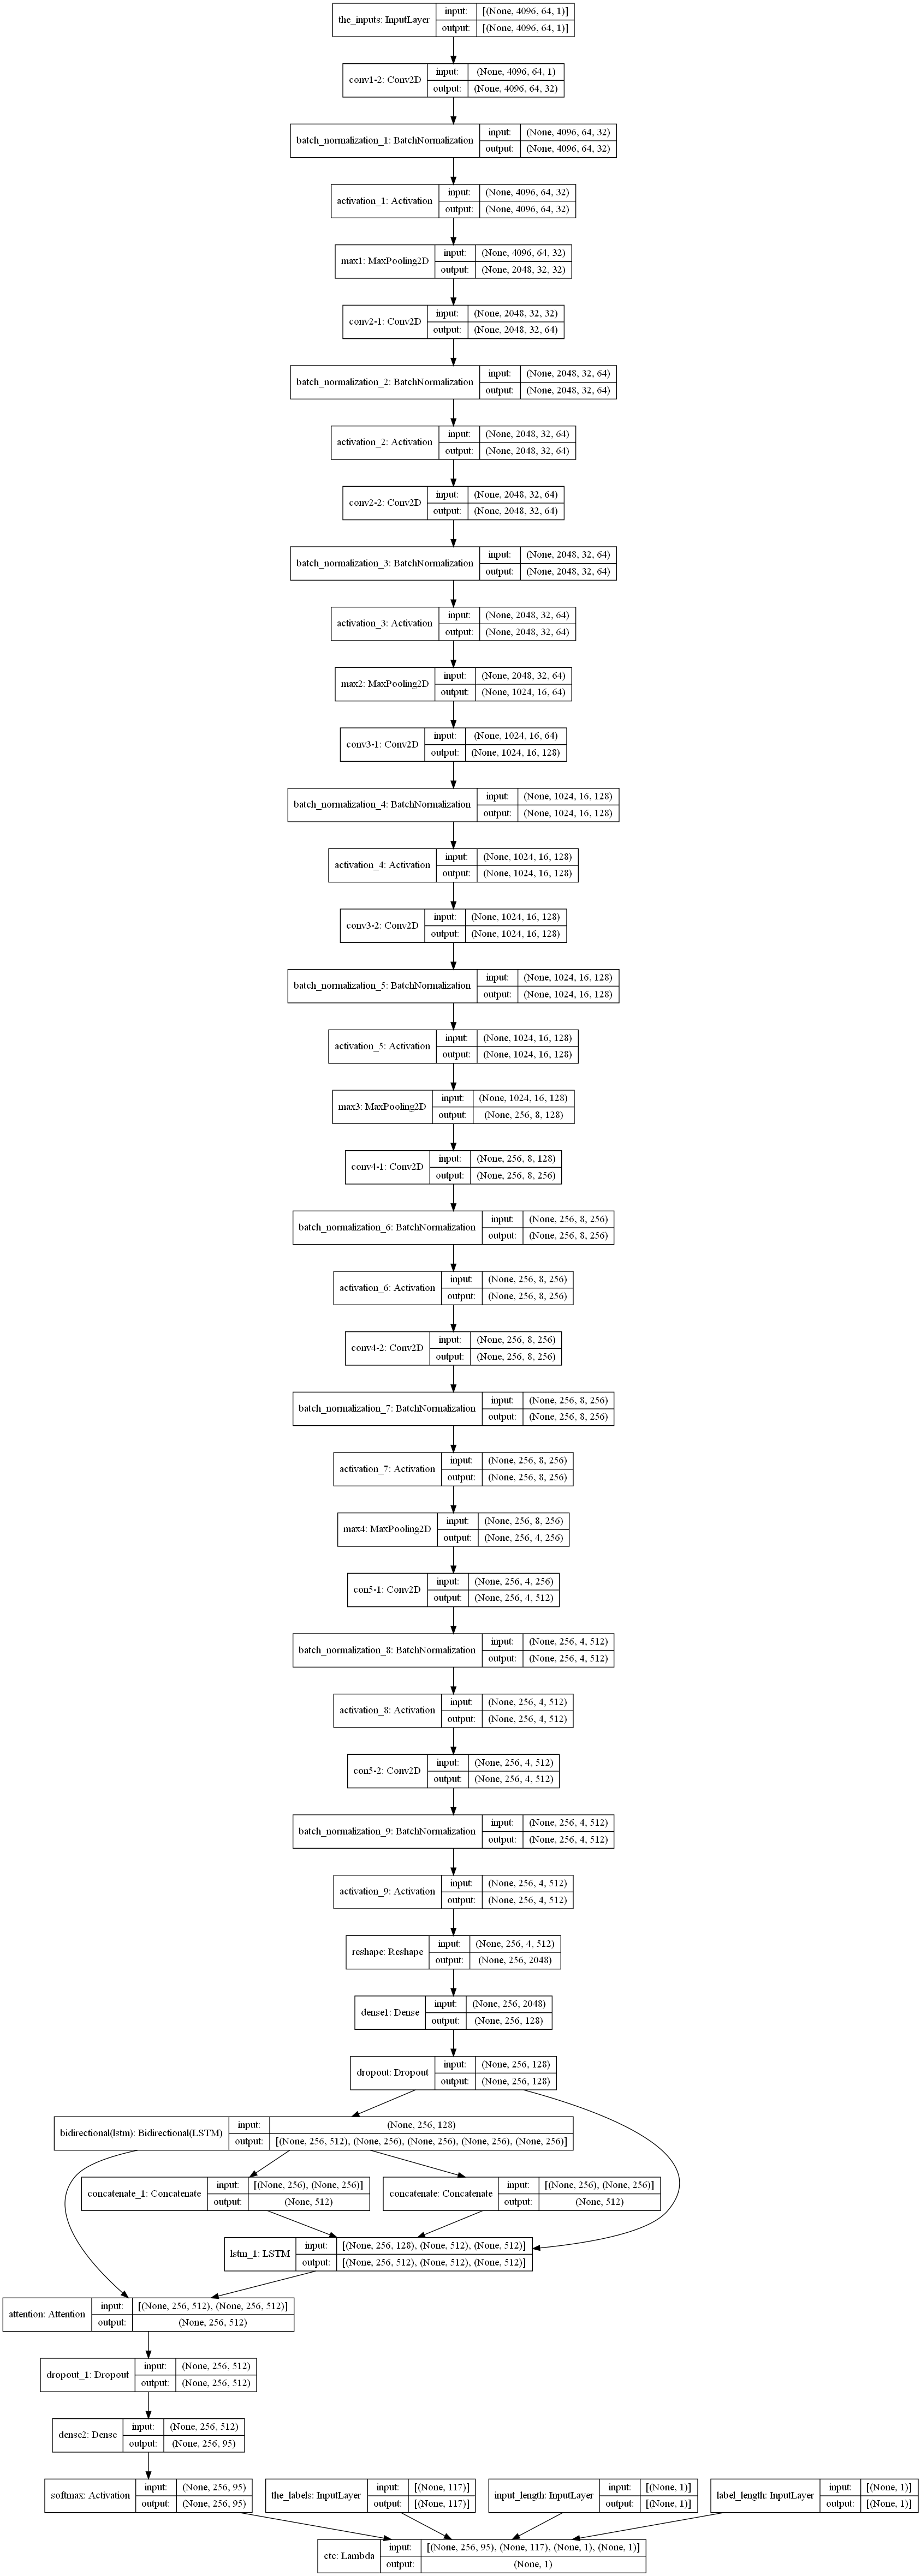

In [13]:
from tensorflow.keras.utils import plot_model
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

plot_model(model=model, show_shapes=True)

# Data generator #

In [14]:
import itertools

def return_classes(string):
    text = [' '] + list(string) + [' ']
    classes = [data.index(x) if x in data else 1 for x in text]
    return np.asarray(classes)

def return_text(classes):
    text = ''
    for c in classes:
        if 0 <= c < len(data) and c != 1:
            text += data[c]
    return text

def decode_batch(out, callback=False):
    ret = []
    for i in range(out.shape[0]):
        out_best = list(np.argmax(out[i, 2:], 1))
        out_best2 = [k for k, g in itertools.groupby(out_best)]
        outstr = return_text(out_best2)
        if callback:
            print(f'{out_best} -> {outstr}')
        ret.append(outstr)
    return ret

def gen_text_image(text, padding=16):
    font = random.choice(fonts)
    font_size = random.randrange(30, 61)
    fnt = ImageFont.truetype(font, font_size)
    width, _ = fnt.getsize(text)
    img = Image.new('L', (width + (padding + 1) * 2, 64), color=255)
    d = ImageDraw.Draw(img)

    if 'calibri' in font:
        d.text((padding + 2,2), text, font=fnt, fill=0)
    elif 'verdana' in font:
        d.text((padding + 2,-8), text, font=fnt, fill=0)
    elif 'constan' in font:
        d.text((padding + 2,0), text, font=fnt, fill=0)
    elif 'corbel' in font:
        d.text((padding + 2,2), text, font=fnt, fill=0)
    elif 'consola' in font:
        d.text((padding + 2,2), text, font=fnt, fill=0)
    elif 'cour' in font:
        d.text((padding + 2,-4), text, font=fnt, fill=0)
    elif 'tahoma' in font:
        d.text((padding + 2,-8), text, font=fnt, fill=0)
    else:
        d.text((padding + 2,-6), text, font=fnt, fill=0)
        
    image = np.array(img)
    image = add_salt_and_pepper(image, 0.2)
    image = otsu_thresholding(image)
    image = inverse(image)
    image = (image / 255.) * 2. - 1.
    return image

def inverse(image):
    return cv2.bitwise_not(image)

def add_salt_and_pepper(image, amount):
    output = np.copy(np.array(image))
    # add salt
    nb_salt = np.ceil(amount * output.size * 0.5)
    coords = [np.random.randint(0, i - 1, int(nb_salt)) for i in output.shape]
    output[coords] = random.randint(50,200)

    # add pepper
    nb_pepper = np.ceil(amount * output.size * 0.5)
    coords = [np.random.randint(0, i - 1, int(nb_pepper)) for i in output.shape]
    output[coords] = random.randint(0,100)
    return np.asarray(Image.fromarray(output))

In [15]:
class TextImageGenerator:
    def __init__(self, labels, img_w=4096, img_h=64,
                 batch_size=16, timesteps=timesteps, training=True, max_text_len=max_label_len):
        self.dim = (img_w, img_h, 1)
        self.batch_size = batch_size
        self.max_text_len = max_text_len
        self.labels = labels
        self.n = len(self.labels)
        self.indexes = list(range(self.n))
        self.training = training
        self.cur_index = 0
        
    def next_sample(self):
        self.cur_index += 1
        if self.cur_index >= self.n:
            self.cur_index = 0
            random.shuffle(self.indexes)
        return self.labels[self.indexes[self.cur_index]]
            
    
    def next_batch(self):
        while True:
            X = np.zeros((self.batch_size, *self.dim))
            y = np.zeros((self.batch_size, self.max_text_len), dtype=int)
            input_length = np.full((self.batch_size, 1), timesteps, dtype=np.float32)
            label_length = np.zeros((self.batch_size, 1), dtype=np.float32)
            
            for i in range(self.batch_size):
                label = self.next_sample()
                # Store sample
                image = np.swapaxes(gen_text_image(label), 0, 1)
                image = np.expand_dims(image, -1)
                X[i, 0:image.shape[0], :] = image

                # Store class
                label_classes = return_classes(label)
                y[i, :len(label_classes)] = label_classes
                label_length[i] = len(label_classes)

            inputs = {
                'the_inputs': X,  # (bs, 4096, 64, 1)
                'the_labels': y,  # (bs, 51)
                'input_length': input_length,  # (bs, 1)
                'label_length': label_length  # (bs, 1)
            }
            outputs = {'ctc': np.zeros([self.batch_size])}   # (bs, 1)
            yield (inputs, outputs)

# Callbacks #

In [16]:
import editdistance
from datetime import datetime
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.callbacks import TensorBoard, ReduceLROnPlateau, Callback

class VizCallback(Callback):
    def __init__(self, y_func, text_img_gen, text_size, num_display_words=10):
        self.y_func = y_func
        self.text_img_gen = text_img_gen
        self.num_display_words = num_display_words
        self.text_size = text_size

    def show_edit_distance(self, num):
        num_left = num
        mean_norm_ed = 0.0
        mean_ed = 0.0
        while num_left > 0:
            word_batch = next(self.text_img_gen.next_batch())[0]
            num_proc = min(word_batch['the_inputs'].shape[0], num_left)
            # predict
            inputs = word_batch['the_inputs'][0:num_proc]
            pred = self.y_func([inputs])[0]
            decoded_res = decode_batch(pred)
            # label
            labels = word_batch['the_labels'][:num_proc].astype(np.int32)
            labels = [return_text(label) for label in labels]
            
            for j in range(num_proc):
                edit_dist = editdistance.eval(decoded_res[j], labels[j])
                mean_ed += float(edit_dist)
                mean_norm_ed += float(edit_dist) / len(labels[j])

            num_left -= num_proc
        mean_norm_ed = mean_norm_ed / num
        mean_ed = mean_ed / num
        print('\nOut of %d samples: \nMean edit distance:'
              '%.3f \nMean normalized edit distance: %0.3f \n'
              % (num, mean_ed, mean_norm_ed))

    def on_epoch_end(self, epoch, logs={}):
        batch = next(self.text_img_gen.next_batch())[0]
        inputs = batch['the_inputs'][:self.num_display_words]
        labels = batch['the_labels'][:self.num_display_words].astype(np.int32)
        labels = [return_text(label) for label in labels]
         
        pred = self.y_func([inputs])[0]
        pred_texts = decode_batch(pred)
        
        for i in range(min(self.num_display_words, len(inputs))):
            print("label: {} - predict: {}".format(labels[i], pred_texts[i]))

        self.show_edit_distance(self.text_size)

In [17]:
batch_size = 16
train_generator = TextImageGenerator(train_labels, training=True, batch_size=batch_size)
val_generator = TextImageGenerator(val_labels, training=False, batch_size=batch_size)
test_generator = TextImageGenerator(test_labels, training=False, batch_size=batch_size)

log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
output_dir = './models/VGG/Attention'
weight_path = f'{output_dir}/ocr_model_{datetime.now().strftime("%Y%m%d-%H%M%S")}' + '_epoch_{epoch:02d}.h5'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

tensorboard = TensorBoard(log_dir=log_dir)
checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)
vis = VizCallback(y_func, test_generator, len(test_labels))
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='min')

initial_learning_rate = 0.001
epochs = 100

callbacks = [early_stop, tensorboard, vis, checkpoint]
# callbacks = [early_stop, tensorboard, vis]
# callbacks = [early_stop, tensorboard, vis, LearningRateScheduler(lr_time_based_decay, verbose=1)]

# Training #

In [18]:
def train(callbacks, batch_size, epochs, initial_epoch=0):
    print('Training process starting...')
    H = model.fit(train_generator.next_batch(),
                  steps_per_epoch=train_len//batch_size,
                  validation_data=val_generator.next_batch(),
                  validation_steps=val_len//batch_size,
                  epochs=epochs, 
                  initial_epoch=initial_epoch,
                  callbacks=callbacks,
                  verbose=1)
    return H

In [19]:
train_len = len(train_labels)
val_len = len(val_labels)

In [20]:
from tensorflow.keras import optimizers

opt = optimizers.Adam(learning_rate=initial_learning_rate)

In [21]:
model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer='adam')

train(callbacks, batch_size, epochs)

Training process starting...


<ipython-input-14-ed1a10243b71>:66: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output[coords] = random.randint(50,200)
<ipython-input-14-ed1a10243b71>:71: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output[coords] = random.randint(0,100)


Epoch 1/100
3913/3913 [==============================] - 1009s 255ms/step - loss: 219.7034 - val_loss: 133.5027
label:  to the   church.  Summerfield   United  Methodist Church   of  Milwaukee,                                            - predict: to the   burh.  ommer ed   Coirad  Cehodst ohurph  o  aue. 
label:  agree  that it   was Gaius Lusiuss   advances   towards  Trebonius   that   led   to his                             - predict: agre  that it   was Caius Cusiuas   adcances   tocards  fPrebomlus   that   fd   to hls 
label:  remarking  that  they were   very  impressive given  the  limitations  of  Game   Boy                                - predict: memoaring   ton   te   sgn  osias sien  the   otationa  of   aoe   o   
label:  to   Rupp  Arena,  Hamburg  Shopping Center,   Lansdowne   Shoppes, and  Southland  Drive.                           - predict: to   Com  Cremna.  Cambuc  Cnoppindg Centen  Cansdocm   Choppes. and  Couhand  Crtve.   
label:  office   in  1982.Rosny   


Out of 349 samples: 
Mean edit distance:65.777 
Mean normalized edit distance: 0.562 


Epoch 00005: val_loss improved from 75.43867 to 64.82618, saving model to ./models/VGG with Attention\ocr_model_20210922-080734_epoch_05.h5
Epoch 6/100
3913/3913 [==============================] - 989s 253ms/step - loss: 78.4370 - val_loss: 95.8924
label:  Hemingway's  The  Snows   of   Kilimanjaro, The  Killers,                                                            - predict: Heningwapy.  The  S hows   o   inia, The  Allsi   
label:  Free scores  by John   Reading  in   the   Choral Public  Domain Library  (ChoralWiki)                               - predict: Frescore  y  hholb Doman h hh   
label:  but,   given   his  public  standing, McGovern   later  made   amends   by putting Daley                             - predict: bt,   phn  h n Hedoen   tad   n deDae 
label:  years,   Pezzali  was held back for  one  year because he did not   achieve the  required                            - pred


Out of 349 samples: 
Mean edit distance:66.914 
Mean normalized edit distance: 0.572 


Epoch 00010: val_loss did not improve from 64.32867
Epoch 11/100
3913/3913 [==============================] - 990s 253ms/step - loss: 77.0899 - val_loss: 88.1265
label:  on  the  MLS   opening  weekend. A fifth exhibition  match was   scheduled against the                               - predict: on  the  MiS   opeing  wend. A ithexehin match was   scheled against the  
label:  Nitrogen                                                                                                             - predict: Nitrogen     
label:  border firing in   Rajouri.On  16   July,   Indian                                                                   - predict: atd figi Aiui
label:  to remember the previous reality  and                                                                                - predict: o remember the previous reality  and   
label:  "the generalized  other" the   individual understands 


Out of 349 samples: 
Mean edit distance:63.083 
Mean normalized edit distance: 0.539 


Epoch 00015: val_loss did not improve from 53.63932
Epoch 16/100
3913/3913 [==============================] - 991s 253ms/step - loss: 56.3113 - val_loss: 83.2301
label:  that   temporal synchrony   serves   for   dynamic coordination                                                      - predict: that  temporal synchrony  serves  for  dynamic coordination   
label:  and   development squad,  with a   view                                                                              - predict: nd  dewelopmen  snuad, wth   w
label:  the prior season.Camilo  rebounded from a mediocre 2012   season  to   be   considered                               - predict: he ios esono miod ondes
label:  singles independently.   For   its first  full-length   record,                                                      - predict: iglsey denty frtfr
label:  remarking  that  they were   very  impressive given  the  li


Out of 349 samples: 
Mean edit distance:61.564 
Mean normalized edit distance: 0.526 


Epoch 00020: val_loss did not improve from 43.42165
Epoch 21/100
3913/3913 [==============================] - 992s 253ms/step - loss: 48.8703 - val_loss: 37.4344
label:  Brazil.   Currently,  this collection gathers cases  between  1952  and 2016.  In Canada,                            - predict: rail.   Curntytclecion gathers cas beten 19 and 201. In Canada,
label:  5%   of   the   area's  economy. The  region   is also working  on alternative sources                               - predict: X  of of  the aras ecomomy. The region isalsoworkng on aternatesorces
label:  the defense   research   and development  community.   It  also urged   the   DCI   to                               - predict: he defense  rech  andeveloment cmunity. t aso urged the  to
label:  and Rubber Stamps:   The Politics  of the Chicago City   Council   from 1863  to the                                 - predict: and Ruber S


Out of 349 samples: 
Mean edit distance:56.868 
Mean normalized edit distance: 0.486 


Epoch 00025: val_loss improved from 37.43444 to 36.15790, saving model to ./models/VGG with Attention\ocr_model_20210922-080734_epoch_25.h5
Epoch 26/100
3913/3913 [==============================] - 992s 253ms/step - loss: 46.5965 - val_loss: 54.2958
label:  late 2018. Unwin was  appointed   Officer  of the                                                                    - predict: ate 2018. UTnwin wos  apointed   Ofcer of the 
label:  disagreed  with  Bjelke-Petersen  and  Liberal                                                                       - predict: disagred   with  Bjelkeeren ad  Liberal   
label:  Bark   Hide  and Horn, a folk-rock  band from   Portland, Oregon,   released  a song                                 - predict: ark   Hide andMorn,a flkrck  ad ror  Prtad, rgon, resed s   
label:  a goalless   draw by Upton Park, but  emerged  victorious  after   a  replay   two   weeks    


Out of 349 samples: 
Mean edit distance:59.307 
Mean normalized edit distance: 0.507 


Epoch 00030: val_loss did not improve from 36.15790


# Testing #